In [1]:
# Install torchsummary if not installed
# Import essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import copy
import os
import torch
from PIL import Image
from torch.utils.data import Dataset
import torchvision
import torchvision.transforms as transforms
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.nn as nn
from torchvision import utils
from torchvision.datasets import ImageFolder
import torch.nn.functional as F
from sklearn.metrics import classification_report
import itertools
from tqdm.notebook import trange, tqdm
from torch import optim
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [2]:
# Define Transformation
transform = transforms.Compose(
    [
        transforms.Resize((255,255)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.RandomRotation(30),
        transforms.ToTensor(),
        transforms.Normalize(mean = [0.485, 0.456, 0.406],std = [0.229, 0.224, 0.225])
   ]
)

In [3]:
import os
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader


# Define your data directories (Make sure these paths are correct)
train_dir = 'train3'   # Path to training images
valid_dir = 'valid3'   # Path to validation images
test_dir = 'test3'     # Path to testing images

# Check if the directories exist
print("Train directory exists:", os.path.exists(train_dir))
print("Validation directory exists:", os.path.exists(valid_dir))
print("Test directory exists:", os.path.exists(test_dir))

# If the directories exist, load the datasets
if os.path.exists(train_dir) and os.path.exists(valid_dir) and os.path.exists(test_dir):
    # Define the necessary transform (assuming 'transform' is already defined)
    transform = torchvision.transforms.Compose([
        torchvision.transforms.Resize((224, 224)),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # Load datasets
    train_set = torchvision.datasets.ImageFolder(train_dir, transform=transform)
    val_set = torchvision.datasets.ImageFolder(valid_dir, transform=transform)
    test_set = torchvision.datasets.ImageFolder(test_dir, transform=transform)

    # Optional: print the dataset sizes
    print(f"Train set size: {len(train_set)}")
    print(f"Validation set size: {len(val_set)}")
    print(f"Test set size: {len(test_set)}")
else:
    print("One or more dataset directories do not exist. Please verify the paths.")

Train directory exists: True
Validation directory exists: True
Test directory exists: True
Train set size: 4174
Validation set size: 1235
Test set size: 602


Train set size: 4174


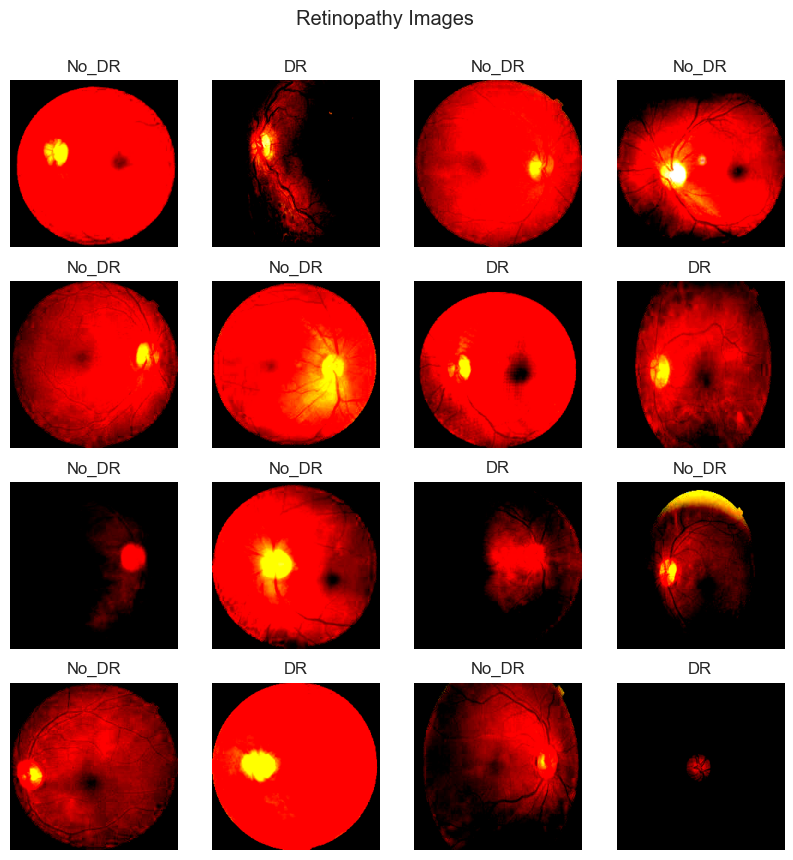

In [4]:
import os
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np  # Make sure to import numpy

# Define the paths for the train datase

# Check if the directory exists
if os.path.exists(train_dir):
    # Define the transform
    transform = torchvision.transforms.Compose([
        torchvision.transforms.Resize((224, 224)),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # Load train set
    train_set = torchvision.datasets.ImageFolder(train_dir, transform=transform)
    print(f"Train set size: {len(train_set)}")
else:
    print("Train directory does not exist. Please verify the path.")

# Visualizing some images from Trainset
if 'train_set' in locals():  # Check if train_set is defined
    CLA_label = {
        0: 'DR',
        1: 'No_DR',
    }

    figure = plt.figure(figsize=(10, 10))
    cols, rows = 4, 4
    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(train_set), size=(1,)).item()  # Randomly pick an image
        img, label = train_set[sample_idx]  # Get the image and label
        figure.add_subplot(rows, cols, i)
        plt.title(CLA_label[label])
        plt.axis("off")
        img_np = img.numpy().transpose((1, 2, 0))  # Convert tensor to numpy and change shape
        img_valid_range = np.clip(img_np, 0, 1)  # Clip pixel values to [0, 1]
        plt.imshow(img_valid_range)

    plt.suptitle('Retinopathy Images', y=0.95)
    plt.show()
else:
    print("train_set is not loaded. Make sure the dataset is loaded correctly.")

In [5]:


# Define the paths for the train, validation, and test datasets
train_dir = "./train3"
val_dir = "./valid3"
test_dir = "./test3"


# Check if directories exist
if os.path.exists(train_dir) and os.path.exists(val_dir) and os.path.exists(test_dir):
    # Define the transform
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # Load datasets
    train_set = torchvision.datasets.ImageFolder(train_dir, transform=transform)
    val_set = torchvision.datasets.ImageFolder(val_dir, transform=transform)
    test_set = torchvision.datasets.ImageFolder(test_dir, transform=transform)

    print(f"Train set size: {len(train_set)}")
    print(f"Validation set size: {len(val_set)}")
    print(f"Test set size: {len(test_set)}")
else:
    print("One or more dataset directories do not exist. Please verify the paths.")

# Import and load Train, Validation, and Test sets
batch_size = 64

# Create DataLoaders
if 'train_set' in locals() and 'val_set' in locals() and 'test_set' in locals():
    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=False)
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)

    print("DataLoaders created successfully.")
else:
    print("Failed to create DataLoaders. Ensure that the datasets are loaded correctly.")

Train set size: 4174
Validation set size: 1235
Test set size: 602
DataLoaders created successfully.


In [6]:
# Print shape of Dataset
for key, value in {'Training data': train_loader, "Validation data": val_loader}.items():
    for X, y in value:
        print(f"{key}:")
        print(f"Shape of X : {X.shape}")
        print(f"Shape of y: {y.shape} {y.dtype}\n")
        break

Training data:
Shape of X : torch.Size([64, 3, 224, 224])
Shape of y: torch.Size([64]) torch.int64

Validation data:
Shape of X : torch.Size([64, 3, 224, 224])
Shape of y: torch.Size([64]) torch.int64



In [7]:
'''This function can be useful in determining the output size of a convolutional layer,
given the input dimensions and the convolutional layer's parameters.'''

def findConv2dOutShape(hin,win,conv,pool=2):
    kernel_size = conv.kernel_size
    stride=conv.stride
    padding=conv.padding
    dilation=conv.dilation

    hout=np.floor((hin+2*padding[0]-dilation[0]*(kernel_size[0]-1)-1)/stride[0]+1)
    wout=np.floor((win+2*padding[1]-dilation[1]*(kernel_size[1]-1)-1)/stride[1]+1)

    if pool:
        hout/=pool
        wout/=pool
    return int(hout),int(wout)

In [8]:
# Define Architecture For Retinopathy Model
class CNN_Retino(nn.Module):

    def __init__(self, params):

        super(CNN_Retino, self).__init__()

        Cin,Hin,Win = params["shape_in"]
        init_f = params["initial_filters"]
        num_fc1 = params["num_fc1"]
        num_classes = params["num_classes"]
        self.dropout_rate = params["dropout_rate"]

        # CNN Layers
        self.conv1 = nn.Conv2d(Cin, init_f, kernel_size=3)
        h,w=findConv2dOutShape(Hin,Win,self.conv1)
        self.conv2 = nn.Conv2d(init_f, 2*init_f, kernel_size=3)
        h,w=findConv2dOutShape(h,w,self.conv2)
        self.conv3 = nn.Conv2d(2*init_f, 4*init_f, kernel_size=3)
        h,w=findConv2dOutShape(h,w,self.conv3)
        self.conv4 = nn.Conv2d(4*init_f, 8*init_f, kernel_size=3)
        h,w=findConv2dOutShape(h,w,self.conv4)

        # compute the flatten size
        self.num_flatten=h*w*8*init_f
        self.fc1 = nn.Linear(self.num_flatten, num_fc1)
        self.fc2 = nn.Linear(num_fc1, num_classes)

    def forward(self,X):

        X = F.relu(self.conv1(X));
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv3(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv4(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, self.num_flatten)
        X = F.relu(self.fc1(X))
        X = F.dropout(X, self.dropout_rate)
        X = self.fc2(X)
        return F.log_softmax(X, dim=1)

In [9]:
import torch
import torch.nn as nn

# Define the CNN model class
class CNN_Retino(nn.Module):
    def __init__(self, params):
        super(CNN_Retino, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=params["shape_in"][0], out_channels=params["initial_filters"], kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=params["initial_filters"], out_channels=params["initial_filters"]*2, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(params["initial_filters"]*2*63*63, params["num_fc1"])
        self.fc2 = nn.Linear(params["num_fc1"], params["num_classes"])
        self.dropout = nn.Dropout(p=params["dropout_rate"])
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, self.num_flat_features(x))  # Flattening for the fully connected layer
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

# Model parameters
params_model = {
    "shape_in": (3, 255, 255),
    "initial_filters": 8,
    "num_fc1": 100,
    "dropout_rate": 0.15,
    "num_classes": 2
}

# Instantiate the model
Retino_model = CNN_Retino(params_model)

# Define computation hardware approach (GPU/CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
Retino_model = Retino_model.to(device)


In [10]:
!pip install torchsummary


In [11]:
from torchsummary import summary

# Model Summary for CNN_Retino
summary(Retino_model, input_size=(3, 255, 255), device=device.type)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 8, 255, 255]             224
              ReLU-2          [-1, 8, 255, 255]               0
         MaxPool2d-3          [-1, 8, 127, 127]               0
            Conv2d-4         [-1, 16, 127, 127]           1,168
              ReLU-5         [-1, 16, 127, 127]               0
         MaxPool2d-6           [-1, 16, 63, 63]               0
            Linear-7                  [-1, 100]       6,350,500
              ReLU-8                  [-1, 100]               0
           Dropout-9                  [-1, 100]               0
           Linear-10                    [-1, 2]             202
Total params: 6,352,094
Trainable params: 6,352,094
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.74
Forward/backward pass size (MB): 13.35
Params size (MB): 24.23
Estim

In [12]:
loss_func = nn.NLLLoss(reduction="sum")

In [13]:
opt = optim.Adam(Retino_model.parameters(), lr=1e-4)
lr_scheduler = ReduceLROnPlateau(opt, mode='min',factor=0.5, patience=20,verbose=1)

In [14]:
# Function to get the learning rate
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']

# Function to compute the loss value per batch of data
def loss_batch(loss_func, output, target, opt=None):

    loss = loss_func(output, target) # get loss
    pred = output.argmax(dim=1, keepdim=True) # Get Output Class
    metric_b=pred.eq(target.view_as(pred)).sum().item() # get performance metric

    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()

    return loss.item(), metric_b

# Compute the loss value & performance metric for the entire dataset (epoch)
def loss_epoch(model,loss_func,dataset_dl,opt=None):

    run_loss=0.0
    t_metric=0.0
    len_data=len(dataset_dl.dataset)

    # internal loop over dataset
    for xb, yb in dataset_dl:
        # move batch to device
        xb=xb.to(device)
        yb=yb.to(device)
        output=model(xb) # get model output
        loss_b,metric_b=loss_batch(loss_func, output, yb, opt) # get loss per batch
        run_loss+=loss_b        # update running loss

        if metric_b is not None: # update running metric
            t_metric+=metric_b

    loss=run_loss/float(len_data)  # average loss value
    metric=t_metric/float(len_data) # average metric value

    return loss, metric

In [15]:
import torch
import copy
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from tqdm import tqdm

# Define transformations for training and validation datasets
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Replace these placeholder paths with the actual paths of your dataset
train_dataset = datasets.ImageFolder(root="./train3", transform=train_transform)
val_dataset = datasets.ImageFolder(root="./valid3", transform=val_transform)

# Create DataLoaders
train_dl = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dl = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the DenseNet201 model
model = models.densenet201(pretrained=True)  # Load a pre-trained DenseNet201 model
num_ftrs = model.classifier.in_features  # Adjust the fully connected layer
model.classifier = torch.nn.Linear(num_ftrs, len(train_dataset.classes))  # Modify the classifier to match the number of classes
model = model.to(device)

# Define loss function, optimizer, and learning rate scheduler
loss_func = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

# Early Stopping class
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = float('inf')
        self.early_stop = False

    def __call__(self, val_loss):
        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

# Function to get current learning rate
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

# Function for calculating loss and metrics for an epoch
def loss_epoch(model, loss_func, data_loader, optimizer=None):
    running_loss = 0.0
    running_metric = 0.0
    len_data = len(data_loader.dataset)

    for xb, yb in data_loader:
        xb, yb = xb.to(device), yb.to(device)

        outputs = model(xb)
        loss = loss_func(outputs, yb)

        if optimizer is not None:
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        running_loss += loss.item() * xb.size(0)
        preds = torch.argmax(outputs, dim=1)
        running_metric += torch.sum(preds == yb).item()

    epoch_loss = running_loss / len_data
    epoch_metric = running_metric / len_data

    return epoch_loss, epoch_metric

# Training and Validation function with Early Stopping
def train_val(model, params):
    epochs = params["epochs"]
    loss_func = params["f_loss"]
    opt = params["optimiser"]
    train_dl = params["train"]
    val_dl = params["val"]
    lr_scheduler = params["lr_change"]
    weight_path = params["weight_path"]

    # Early stopping
    early_stopping = EarlyStopping(patience=5, min_delta=0.001)

    # History of loss and accuracy
    loss_history = {"train": [], "val": []}
    metric_history = {"train": [], "val": []}

    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = float('inf')

    for epoch in tqdm(range(epochs)):
        current_lr = get_lr(opt)

        # Training
        model.train()
        train_loss, train_metric = loss_epoch(model, loss_func, train_dl, opt)
        loss_history["train"].append(train_loss)
        metric_history["train"].append(train_metric)

        # Validation
        model.eval()
        with torch.no_grad():
            val_loss, val_metric = loss_epoch(model, loss_func, val_dl)
            loss_history["val"].append(val_loss)
            metric_history["val"].append(val_metric)

        # Save best model if validation loss decreases
        if val_loss < best_loss:
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            torch.save(model.state_dict(), weight_path)

        # Step the scheduler
        lr_scheduler.step(val_loss)

        # Check for early stopping
        early_stopping(val_loss)
        if early_stopping.early_stop:
            print(f"Early stopping at epoch {epoch+1}")
            break

    model.load_state_dict(best_model_wts)

    return loss_history, metric_history

# Parameters for training
params = {
    "train": train_dl,
    "val": val_dl,
    "epochs": 50,
    "f_loss": loss_func,
    "optimiser": optimizer,
    "lr_change": scheduler,
    "weight_path": "Densenet__weight.pth"
}

# Run the training and validation process with early stopping
loss_history, metric_history = train_val(model, params)

# At this point, loss_history and metric_history contain training and validation loss and accuracy.


 22%|██▏       | 11/50 [12:29:24<44:16:58, 4087.64s/it]


Early stopping at epoch 12


In [16]:
# Print training and validation loss and accuracy for each epoch
for epoch in range(len(loss_history["train"])):
    print(f"Epoch {epoch+1}/{params['epochs']}:")
    print(f"  Training Loss: {loss_history['train'][epoch]:.4f}, Training Accuracy: {metric_history['train'][epoch]:.4f}")
    print(f"  Validation Loss: {loss_history['val'][epoch]:.4f}, Validation Accuracy: {metric_history['val'][epoch]:.4f}")

Epoch 1/50:
  Training Loss: 0.2691, Training Accuracy: 0.8963
  Validation Loss: 0.2617, Validation Accuracy: 0.9053
Epoch 2/50:
  Training Loss: 0.1643, Training Accuracy: 0.9418
  Validation Loss: 0.2006, Validation Accuracy: 0.9166
Epoch 3/50:
  Training Loss: 0.1418, Training Accuracy: 0.9523
  Validation Loss: 0.1274, Validation Accuracy: 0.9595
Epoch 4/50:
  Training Loss: 0.1169, Training Accuracy: 0.9583
  Validation Loss: 0.3694, Validation Accuracy: 0.8988
Epoch 5/50:
  Training Loss: 0.1178, Training Accuracy: 0.9609
  Validation Loss: 0.2132, Validation Accuracy: 0.9223
Epoch 6/50:
  Training Loss: 0.1117, Training Accuracy: 0.9624
  Validation Loss: 0.0804, Validation Accuracy: 0.9789
Epoch 7/50:
  Training Loss: 0.0745, Training Accuracy: 0.9770
  Validation Loss: 0.0657, Validation Accuracy: 0.9798
Epoch 8/50:
  Training Loss: 0.0521, Training Accuracy: 0.9844
  Validation Loss: 0.0719, Validation Accuracy: 0.9781
Epoch 9/50:
  Training Loss: 0.0663, Training Accuracy: 

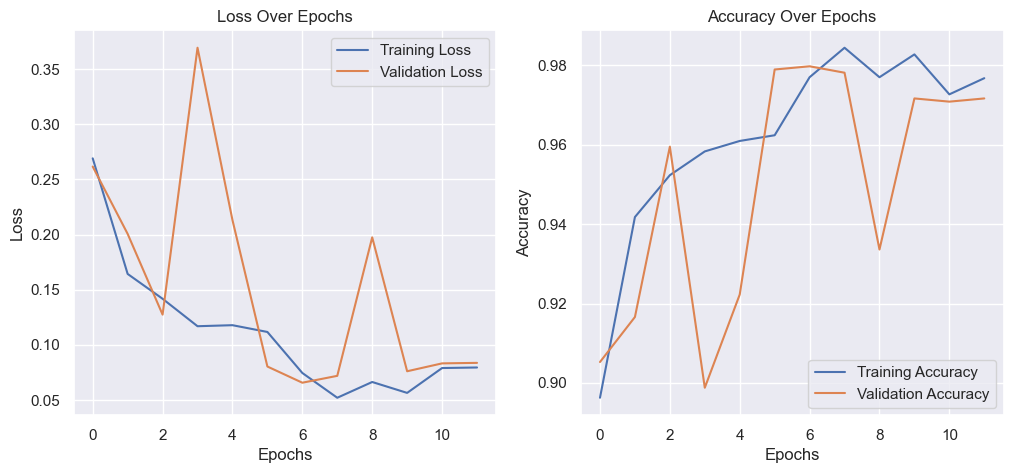

In [17]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(loss_history["train"], label='Training Loss')
plt.plot(loss_history["val"], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(metric_history["train"], label='Training Accuracy')
plt.plot(metric_history["val"], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [18]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define a transformation for the test dataset (same as validation)
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Replace this path with the actual path to your test dataset
test_dataset = datasets.ImageFolder(root="./test3", transform=test_transform)

# Create DataLoader for the test dataset
test_dl = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load the best model (assuming you saved it earlier)
model = models.densenet201(pretrained=False)  # Change pretrained to False since you are loading custom weights
num_ftrs = model.classifier.in_features
model.classifier = torch.nn.Linear(num_ftrs, len(test_dataset.classes))

# Load the model weights
try:
    model.load_state_dict(torch.load("Densenet__weight.pth"))
    print("Model weights loaded successfully.")
except FileNotFoundError:
    print("Model weights file not found. Please check the path.")
    exit()  # Exit if model loading fails

# Move the model to the appropriate device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Calculate accuracy, precision, recall, F1 score, AUC, and specificity on the test set
all_preds = []
all_targets = []
all_probs = []
correct = 0
total = 0
model.eval()

with torch.no_grad():
    for xb, yb in test_dl:
        xb, yb = xb.to(device), yb.to(device)
        outputs = model(xb)

        # Apply softmax to get probabilities
        probabilities = torch.softmax(outputs, dim=1)

        preds = torch.argmax(probabilities, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_targets.extend(yb.cpu().numpy())
        all_probs.extend(probabilities.cpu().numpy())  # Store probabilities for AUC calculation
        
        correct += (preds == yb).sum().item()
        total += yb.size(0)

# Calculate test accuracy
test_accuracy = correct / total

# Calculate Precision, Recall, F1 Score
precision, recall, f1, _ = precision_recall_fscore_support(all_targets, all_preds, average='weighted')

# AUC (requires one-vs-all for multiclass)
one_hot_targets = np.eye(len(np.unique(all_targets)))[all_targets]
# Use all_probs which contains the probabilities for each class
auc_score = roc_auc_score(one_hot_targets, np.array(all_probs), multi_class='ovr')

# Calculate specificity for each class
cm = confusion_matrix(all_targets, all_preds)
specificities = []
for i in range(len(cm)):
    tn = np.sum(np.delete(np.delete(cm, i, 0), i, 1))  # True negatives
    fp = np.sum(np.delete(cm, i, 0)[:, i])  # False positives
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificities.append(specificity)

# Print metrics
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print(f'AUC Score: {auc_score * 100:.2f}%')

# Print average specificity over all classes
avg_specificity = np.mean(specificities)
print(f'Average Specificity: {avg_specificity * 100:.2f}%')



Model weights loaded successfully.
Test Accuracy: 98.17%
Precision: 98.21%
Recall: 98.17%
F1 Score: 98.18%
AUC Score: 99.67%
Average Specificity: 98.36%


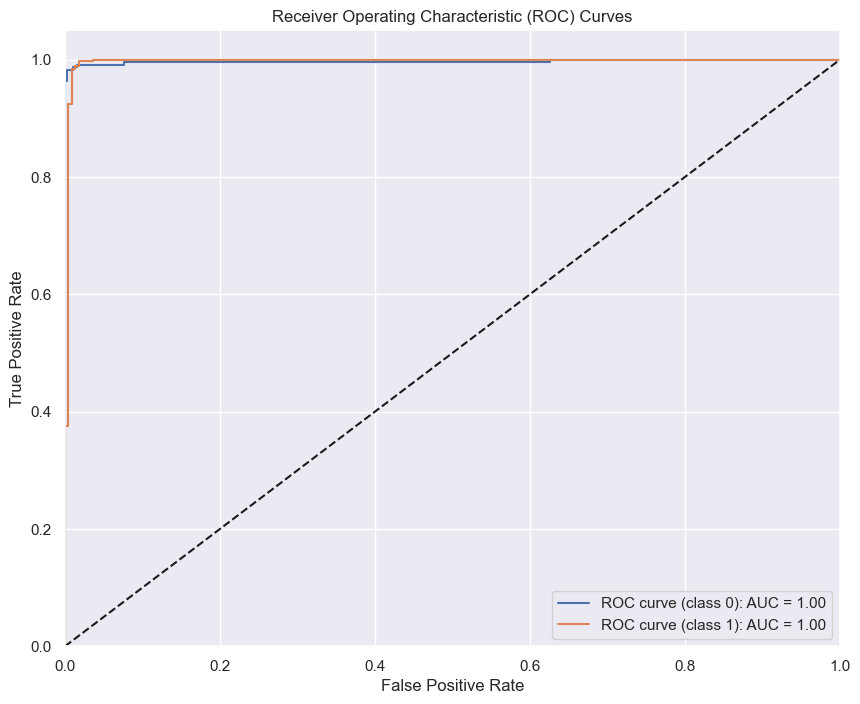

In [19]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score, roc_curve, auc

# AUC (requires one-vs-all for multiclass)
one_hot_targets = np.eye(len(np.unique(all_targets)))[all_targets]
auc_score = roc_auc_score(one_hot_targets, np.array(all_probs), multi_class='ovr')

# Calculate the ROC curve for each class
n_classes = one_hot_targets.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(one_hot_targets[:, i], np.array(all_probs)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}): AUC = {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()


True Positives (TP): 370
False Positives (FP): 2
False Negatives (FN): 9
True Negatives (TN): 221


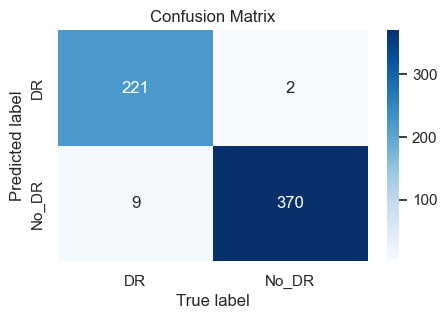

In [20]:
import torch
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Create confusion matrix
cm = confusion_matrix(all_targets, all_preds)

# Extract TP, FP, TN, FN for binary classification
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives
TP = cm[1, 1]  # True Positives

# Print the four key values
print(f'True Positives (TP): {TP}')
print(f'False Positives (FP): {FP}')
print(f'False Negatives (FN): {FN}')
print(f'True Negatives (TN): {TN}')

# Visualization of the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            yticklabels=test_dataset.classes,
            xticklabels=test_dataset.classes)
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()



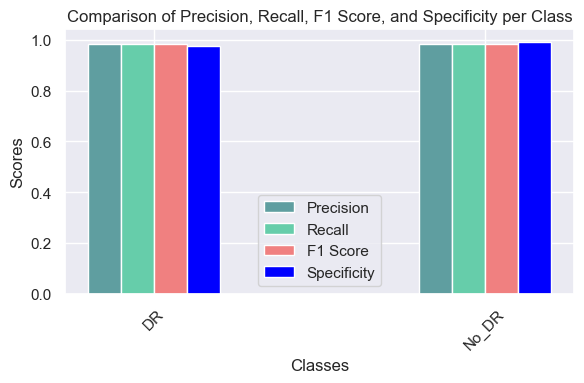

In [21]:
# Visualization with histograms
classes = test_dataset.classes  # Class names from the dataset
x = np.arange(len(classes))  # Label locations
width = 0.1  # Width of the bars

# Create subplots for the bar plot
fig, ax = plt.subplots(figsize=(6, 4))

# Plot precision, recall, f1 score, and specificity as bar charts
rects1 = ax.bar(x - width*1.5, precision, width, label='Precision', color='cadetblue')
rects2 = ax.bar(x - width/2, recall, width, label='Recall', color='mediumaquamarine')
rects3 = ax.bar(x + width/2, f1, width, label='F1 Score', color='lightcoral')
rects4 = ax.bar(x + width*1.5, specificities, width, label='Specificity', color='blue')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Precision, Recall, F1 Score, and Specificity per Class')
ax.set_xticks(x)
ax.set_xticklabels(classes, rotation=45)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [22]:
import torch

# Assuming 'model' is your ResNet model
torch.save(model.state_dict(), 'densenet_model_comnined.pth')
